## Content 

 <b>1 | Preprocessing Steps</b>
 
    1.1 Import Libraries
    1.2 Configure Settings
    1.3 Import Files

 <b>2 | Structure Investigation</b>
 
    2.1 Basic Steps
    2.2 Null Value Check
    2.3 Structure of non-numerical features
    2.4 Structure of numerical features
    
    
 <b>3 | Univariate Analysis</b>
 
    3.1 Summary for Columns (Describe)
    3.2 Individual Column Shape Observation
    3.3 Individual Column Value Observation (Min, Max and Outlier)

 <b>4 | Multivariate Analysis</b>
 
    4.1 Creating Relation Matrix and Graph
    4.2 Relation With Species
    4.3 Other Interesting Relationships
 

### 1 | Preprocessing Steps

#### 1.1 | Import Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import math
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#### 1.2 | Configure Settings

In [2]:
%matplotlib inline
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',100)          # Set now of columns visible to 100
pd.set_option('display.max_rows',100)          # Set now of rows visible to 100

#### 1.3 | Import Files

In [3]:
# Current Working Directory
print("Current Working Directory - "+os.getcwd())
df_raw=pd.read_csv("/Users/abhi011097/Workspace/Dataset_Analysis/5_Iries_Species/Dataset/Iris.csv")
df=df_raw.copy()

Current Working Directory - /Users/abhi011097/Workspace/Dataset_Analysis/6_Iries_Species


### 2 | Structure Investigation

#### 2.1 | Basic Steps

In [4]:
df.shape 

(150, 6)

In [5]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
pd.value_counts(df.dtypes)

float64    4
int64      1
object     1
dtype: int64

***
#### 2.2 | Null Value Check
* No null values Observed
***

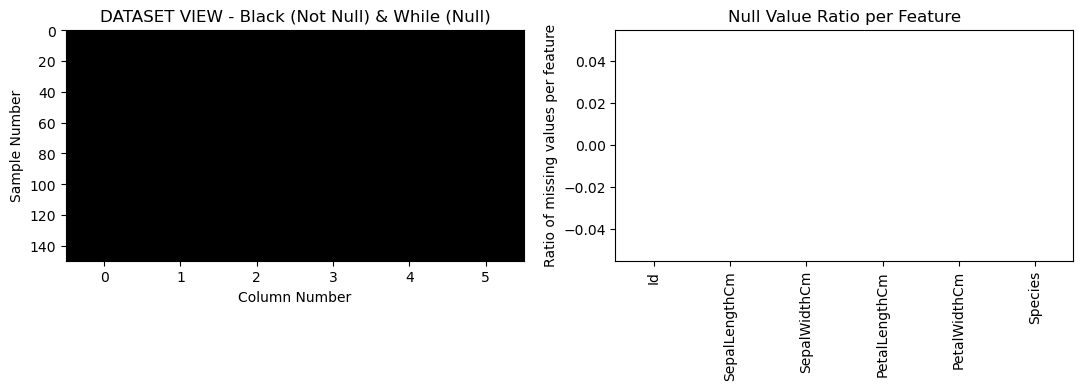

In [10]:
# Combined Plot

plt.subplots(1,2,figsize=(13,3))
plt.subplot(1,2,1)
plt.imshow(df.isna(), aspect="auto", interpolation="nearest", cmap="gray") # we can test any condition in df using this graph
plt.xlabel("Column Number")
plt.ylabel("Sample Number")
plt.title("DATASET VIEW - Black (Not Null) & While (Null)")
plt.subplot(1,2,2)
df.isna().mean().sort_values().plot( kind="bar", title="Null Value Ratio per Feature", ylabel="Ratio of missing values per feature")
plt.show()

***
#### 2.3 | Structure of non-numerical features
* Only 1 non numerical column
* Column value is nominal type
* Has 3 distinct values
***


In [13]:
# non-numerical features
df.select_dtypes(exclude="number").head()

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [14]:
df.describe(exclude="number")

,Species
count,150
unique,3
top,Iris-setosa
freq,50


In [74]:
df["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

#### 2.4 | Structure of numerical features

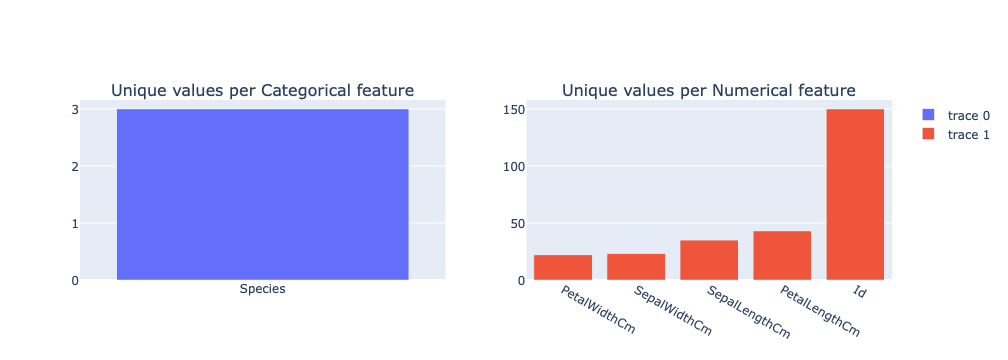

In [135]:
fig = make_subplots(rows=1, cols=2,
                    subplot_titles=("Unique values per Categorical feature", "Unique values per Numerical feature"))


temp_data=df.select_dtypes(exclude="number").nunique().sort_values()

fig.add_trace(
    go.Bar(x=temp_data.index, y=temp_data.values),
    row=1, col=1
)



temp_data=df.select_dtypes(include="number").nunique().sort_values()

fig.add_trace(
    go.Bar(x=temp_data.index, y=temp_data.values),
    row=1, col=2
)

#fig.update_layout(showlegend=False)
fig.show()

***
#### 2.5 | Value Behaviour

* Each point in this figure is a sample (i.e. a row) in our dataset and each subplot represents a different feature. 
* The y-axis shows the feature value, while the x-axis is the sample index
***

* Observation

    * Values in each subpots appear to be in range 
    * No extreme values / Wrong Value observed 
***

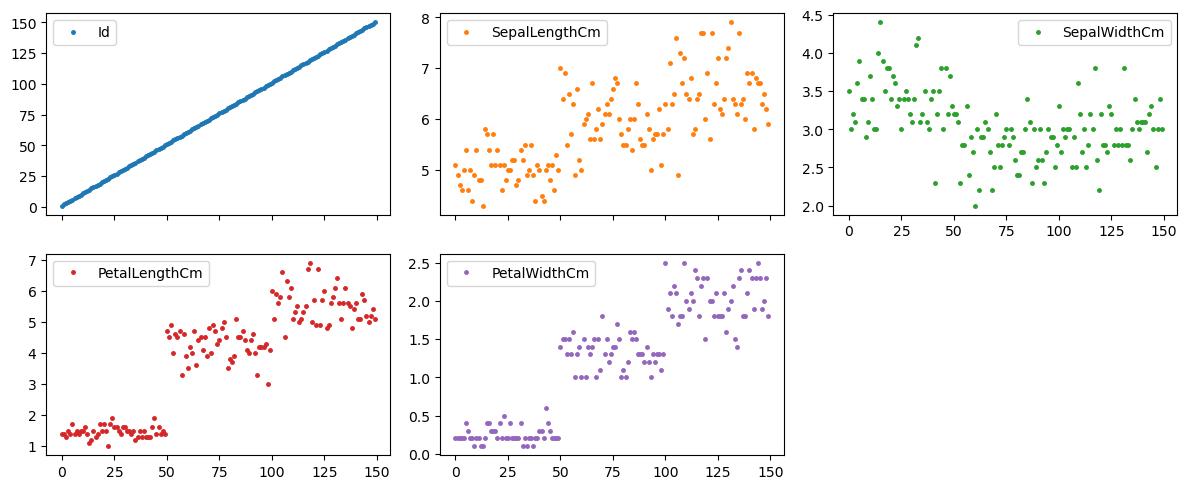

In [18]:
# For all Numerical columnn for all rows 
df.plot(lw=0, marker=".", subplots=True, layout=(-1, 3),
          figsize=(12,5), markersize=5)
plt.tight_layout()

In [38]:
df.drop(columns='Id',inplace=True)

### 3 | Univariate Content Analysis

#### 3.1 | Summary for Columns (Describe)

In [19]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


***
#### 3.2 | Individual Column Shape 

***

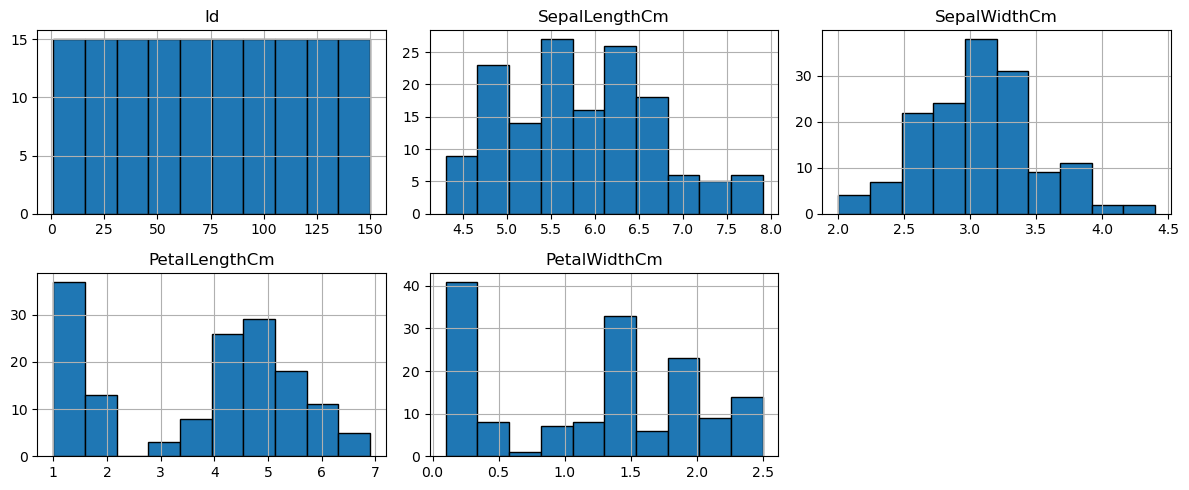

In [20]:
# Plots the histogram for each numerical feature in a separate subplot
figsize_val=(12,5)
layout_val=(-1, 3)
df.hist(bins=10, figsize=figsize_val, layout=layout_val, edgecolor="black")
plt.tight_layout();

In [21]:
df.skew()

Id               0.000000
SepalLengthCm    0.314911
SepalWidthCm     0.334053
PetalLengthCm   -0.274464
PetalWidthCm    -0.104997
dtype: float64

***
#### 3.3 | Individual Column Value Observation (Min, Max and Outlier)

* We have used min/max for finding corners ,  box plot to visualise and iqr method to list outlier countries
* SepalWidthCm is the only column with outliers
* Below is the min max and outlier for all columns    
 
<b> SepalLengthCm </b>
* Min Value -> 4.3 | Species ->  Iris-setosa
* Max Value -> 7.9 | Species ->  Iris-virginica
* Outliers ->  

***

<b>SepalWidthCm</b>
Column ->  SepalWidthCm 
* Min Value -> 2.0 | Species ->  Iris-versicolor
* Max Value -> 4.4 | Species ->  Iris-setosa
* Outliers ->  4.4, 4.1, 4.2, 2.0
 **********

<b>PetalLengthCm</b> 
* Min Value -> 1.0 | Species ->  Iris-setosa
* Max Value -> 6.9 | Species ->  Iris-virginica
* Outliers -> 

 **********

<b>PetalWidthCm</b> 
* Min Value -> 0.1 | Species ->  Iris-setosa
* Max Value -> 2.5 | Species ->  Iris-virginica
* Outliers -> 

 ************ 

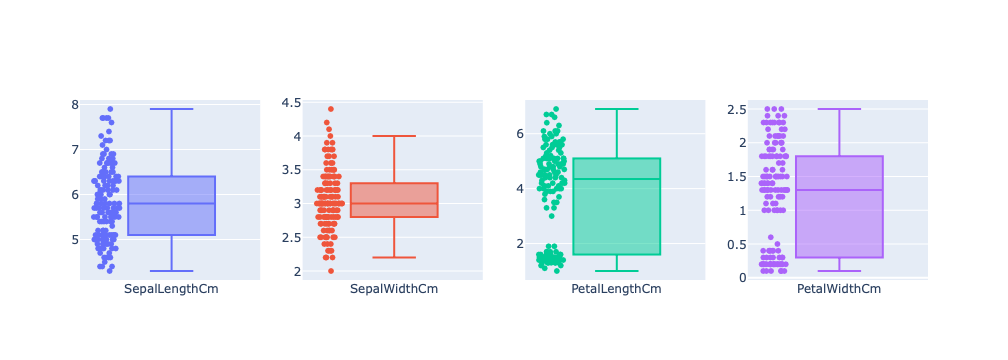

In [22]:
vars = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
fig = make_subplots(rows=1, cols=len(vars))
for i, var in enumerate(vars):
    fig.add_trace(
        go.Box(y=df[var],
        name=var),
        row=1, col=i+1
    )

fig.update_traces(boxpoints='all', jitter=.3)
fig.update_layout(showlegend=False)
fig.show()

In [33]:
upper =df.quantile(0.75)+1.5 *(df.quantile(0.75)-df.quantile(0.25))
lower = df.quantile(0.25)-1.5 *(df.quantile(0.75)-df.quantile(0.25))

columns_to_be_checked=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']

for i in columns_to_be_checked:
    temp_min=df[df[i]== df[i].min()][['Species',i]]
    temp_max=df[df[i]== df[i].max()][['Species',i]]
    
    print('\nColumn -> ',i,'\nMin Value ->',temp_min[i].values[0],'| Species -> ',
          str(set(temp_min['Species'].to_list())).replace("'",'').replace('{','').replace('}',''))
    
    print('Max Value ->',temp_max[i].values[0],'| Species -> ',
          str(set(temp_max['Species'].to_list())).replace("'",'').replace('{','').replace('}',''))
    
    x= df[ (df[i]<round(lower[i],2)) |  (df[i]>round(upper[i],2))][i].to_list()
    print('Outliers -> ',str(x).replace("'",'').replace('[','').replace(']',''))
    print('\n','*'*10)


Column ->  SepalLengthCm 
Min Value -> 4.3 | Species ->  Iris-setosa
Max Value -> 7.9 | Species ->  Iris-virginica
Outliers ->  

 **********

Column ->  SepalWidthCm 
Min Value -> 2.0 | Species ->  Iris-versicolor
Max Value -> 4.4 | Species ->  Iris-setosa
Outliers ->  4.4, 4.1, 4.2, 2.0

 **********

Column ->  PetalLengthCm 
Min Value -> 1.0 | Species ->  Iris-setosa
Max Value -> 6.9 | Species ->  Iris-virginica
Outliers ->  

 **********

Column ->  PetalWidthCm 
Min Value -> 0.1 | Species ->  Iris-setosa
Max Value -> 2.5 | Species ->  Iris-virginica
Outliers ->  

 **********


### 4 | Multivariate Investigation

#### 4.1 | Creating Relation Matrix and Graph

In [39]:
temp_corr=df.corr()
temp_corr

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


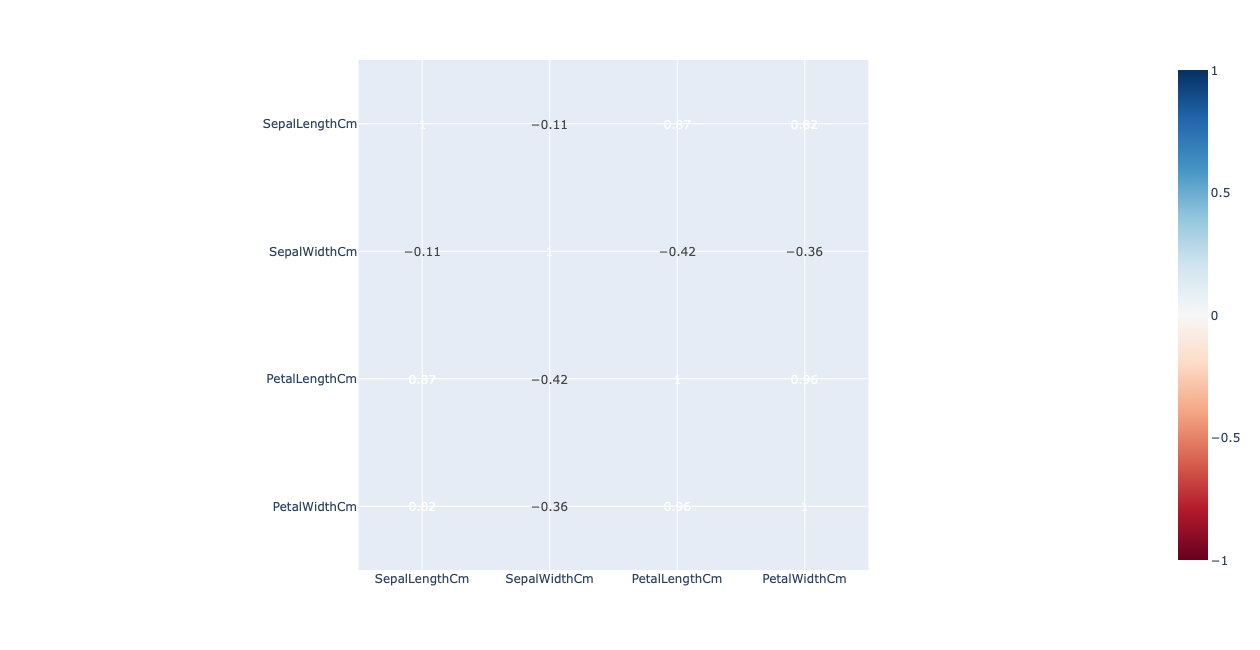

In [40]:
fig = px.imshow(df.corr().round(2),zmin=-1,zmax=1, text_auto=True,width=1200,height=650,aspect=None,color_continuous_scale='rdbu')
fig.show()

#### 4.2 | Relation With Species

<Figure size 1200x400 with 0 Axes>

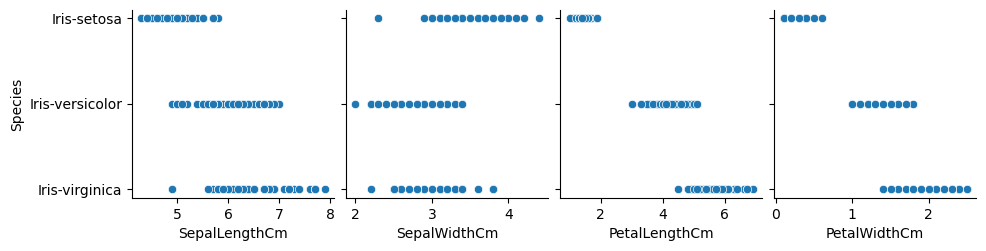

In [51]:
# Observing relationship type with corr values


sns.pairplot(data=df,
                  y_vars='Species',
                  x_vars=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
)
                  
plt.show()


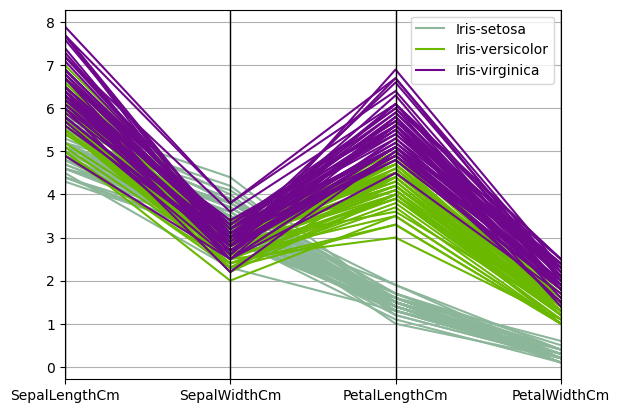

In [61]:
pd.plotting.parallel_coordinates(df, "Species")
plt.show()

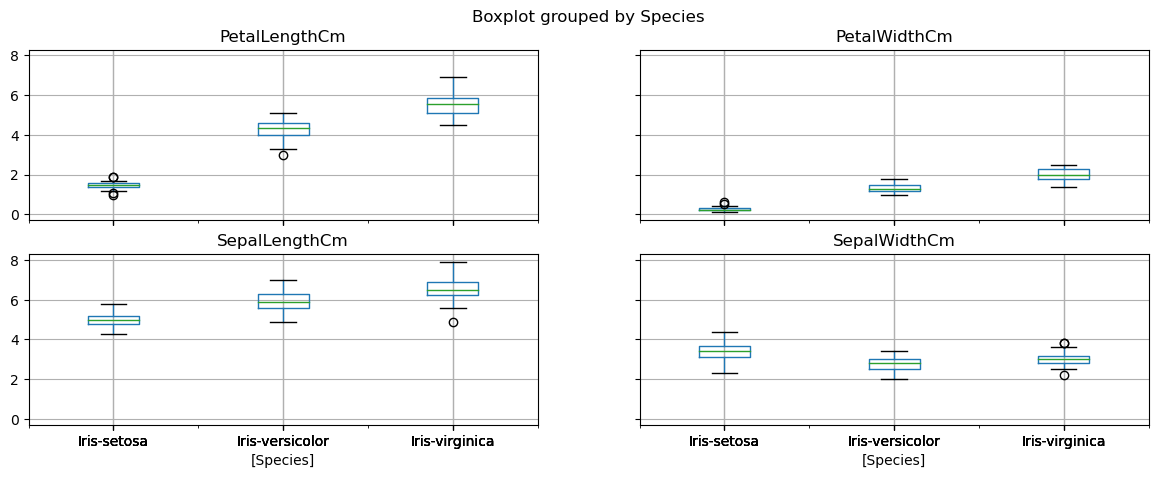

In [67]:
df.boxplot(by="Species", figsize=(14, 5))
plt.show()

#### 4.3 | Other Interesting Relationships
* SepalLengthCm shares strong relationship with PetalLengthCm and PetalWidthCm
* PetalWidthCm and PetalLengthCm have strong relationship among them.
* SepalLengthCm SepalWidthCm has no relationship

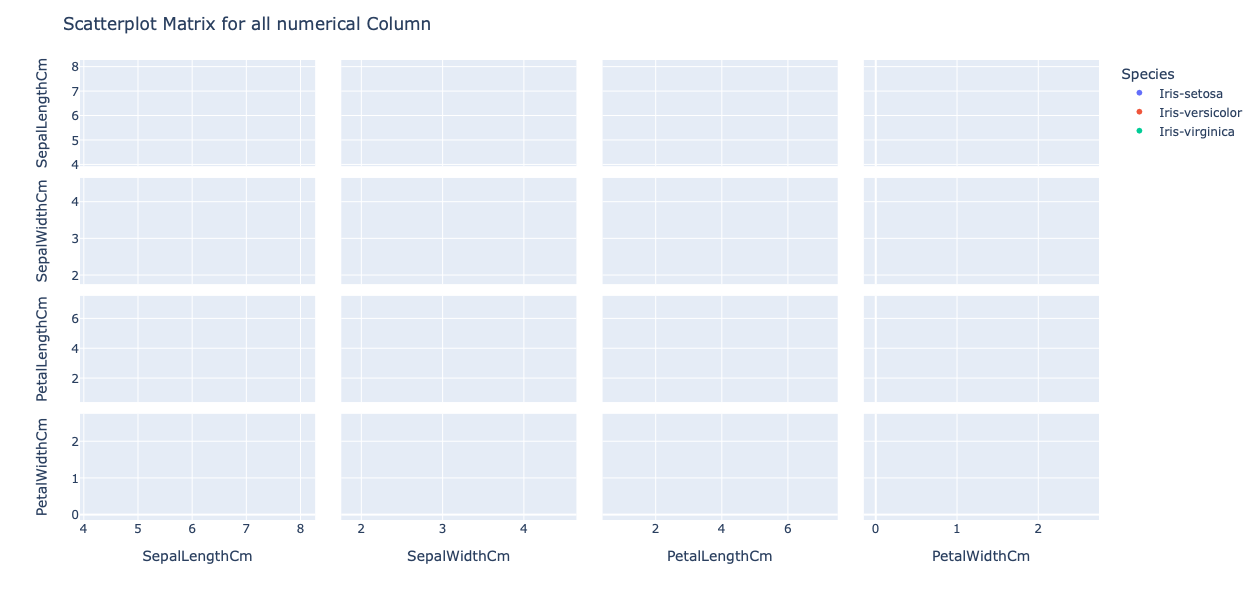

In [44]:
fig = px.scatter_matrix(
            df,
            dimensions=df.select_dtypes(include='number').columns,
            color="Species"
                        )
fig.update_layout(
    title='Scatterplot Matrix for all numerical Column',
    width=len(df.select_dtypes(include='number').columns)*225,
    height=len(df.select_dtypes(include='number').columns)*150,
)


fig.show()

In [45]:
res = [(a, b) for idx, a in enumerate(temp_corr.index) for b in temp_corr.index[idx + 1:]]

strong=[]
moderate=[]
weak=[]
no_relationship=[]
for x,y in res:
    p=temp_corr[x][y]
    if p >= 0.75 or p <= -0.75:
        strong.append((x,y))
    elif p >= 0.50 or p <= -0.50:
        moderate.append((x,y))
    elif p >= 0.25 or p <= -0.25:
        weak.append((x,y))
    else :
        no_relationship.append((x,y))
    
print('\nStrong -> ',strong)
print('\nModerate -> ',moderate)
print('\nWeak -> ',weak)
print('\nNo_relationship -> ',no_relationship)


Strong ->  [('SepalLengthCm', 'PetalLengthCm'), ('SepalLengthCm', 'PetalWidthCm'), ('PetalLengthCm', 'PetalWidthCm')]

Moderate ->  []

Weak ->  [('SepalWidthCm', 'PetalLengthCm'), ('SepalWidthCm', 'PetalWidthCm')]

No_relationship ->  [('SepalLengthCm', 'SepalWidthCm')]
